In [4]:
# ABM simulation
import numpy as np

In [5]:
S0 = 3000 ; mu = 500; sig = 700;

In [6]:
deltaT = 1/252; 
def generate_ABM_path(days,start,drift,sigma):
    S_path=[start]
    for i in range(50):
        S_next = S_path[-1] + drift*deltaT + sigma*deltaT**0.5*np.random.normal(0,1,1)[0]
        S_path.append(S_next)
    
    return S_path   

In [7]:
import matplotlib.pyplot as plt
D = np.linspace(0,50,51)
for i in range(1000):
    plt.plot(generate_ABM_path(50,S0,mu,sig))
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
import pandas as pd

In [9]:
Paths=[];
for i in range(10000):
    Paths.append(generate_ABM_path(50,S0,mu,sig))

In [10]:
D= pd.DataFrame(Paths)

In [11]:
D[50].describe()
# it shows the expected mean and expected variance at D50

count    10000.000000
mean      3098.432278
std        308.128077
min       1856.908100
25%       2890.849567
50%       3102.374792
75%       3308.032077
max       4170.066998
Name: 50, dtype: float64

## GBM

In [21]:
def generate_GBM_path(days,start,drift,sigma):
    S_path=[start]
    for i in range(50):
        S_next = S_path[-1] * np.exp( (drift-0.5*sigma**2)*deltaT + sigma*deltaT**0.5*np.random.normal(0,1,1)[0])
        S_path.append(S_next)
    
    return S_path   

In [22]:
drift = 0.05;sigma=0.1;
np.exp(drift-0.5*sigma**2)*deltaT + sigma*deltaT**0.5*np.random.normal(0,1,1)[0]

-0.003710080987984845

In [45]:
Paths=[];
for i in range(10000):
    Paths.append(generate_GBM_path(50,S0,0.05,0.1))

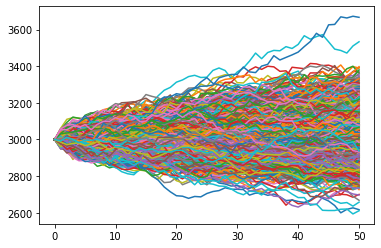

count    10000.000000
mean      3030.945658
std        134.309556
min       2527.648779
25%       2937.982945
50%       3030.168029
75%       3121.665152
max       3585.550842
Name: 50, dtype: float64

In [46]:
D = np.linspace(0,50,51)
for i in range(1000):
    plt.plot(generate_GBM_path(50,S0,0.05,0.1))
plt.show()
D2= pd.DataFrame(Paths)
D2[50].describe()

In [47]:
#expected mean is the same to X0*np.exp(mu-sig^2/2)
print("the expected mean is %.4f"%(S0*np.exp((0.05)*50/252)))

the expected mean is 3029.9100


In [156]:
#the expected std is S0 * ( np.exp(2*mu*T)*(sigma^2*T-1))**0.5
T=50/252;mu=0.05;sigma=0.1;

std_GBM = (S0**2  * np.exp(2*mu*T) * (np.exp(sigma**2*T)-1)  ) **0.5
std_GBM

135.0298928299861

In [158]:
# study of the correlation of Xt and Xs given T>S
def std_X_T(T,mu,sigma):
    std=(S0**2  * np.exp(2*mu*T) * (np.exp(sigma**2*T)-1)  ) **0.5
    return std

In [160]:
std_X_T(50/252,0.05,0.1)

135.0298928299861

In [169]:
#recall covariance is E(Xt*Xs)-E(Xt)*E(Xs)
def cov_x_t(s,t,mu,sigma):
    Cov=S0**2 * np.exp(mu*(t+s)) * (np.exp(sigma**2*s)-1)
    return Cov/(std_X_T(s,mu,sigma)*std_X_T(t,mu,sigma))

In [191]:
cov_x_t(3/252,7/252,0.05,0.1)

0.6546276920437949

In [195]:
A

array([[   0,    1,    2, ...,   48,   49,   50],
       [  51,    0,    0, ...,    0,    0,    0],
       [ 102,    0,    0, ...,    0,    0,    0],
       ...,
       [2448,    0,    0, ...,    0,    0,    0],
       [2499,    0,    0, ...,    0,    0,    0],
       [2550,    0,    0, ...,    0,    0,    0]])

In [226]:
A=np.zeros([51,51])
for s in range(1,51):
    for t in range(1,51):
        
        if s<t:
            #print(cov_x_t(s/252,t/252,0.05,0.1))
            A[s][t] = cov_x_t(s/252,t/252,0.05,0.1)
        else:
            A[s][t] = cov_x_t(t,s,0.05,0.1)


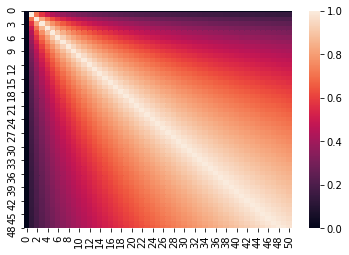

In [227]:
sb.heatmap(A)

In [225]:
#D2.corr()

In [ ]:
# the correlation of Xt and Xs depends on its overlapping period and total long

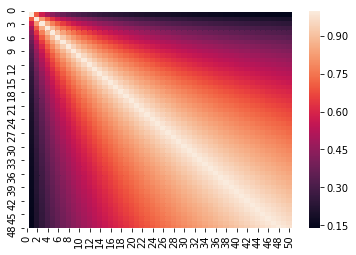

In [177]:
import seaborn as sb
sb.heatmap(D2.corr())

In [ ]:
# from the two graph, it can be concluded that our simulation is good and the correlation between Xt and Xs 
# increases with larger overlapping trip and shorter T - S

In [247]:
## simulation of correlated GBM

def generate_corr_GBM_path(days,start1,start2,drift1,drift2,sigma1,sigma2,cor):
    S_path1=[start1]
    S_path2=[start2]
    for i in range(50):
        z1=np.random.normal(0,1,1)[0]
        z2=np.random.normal(0,1,1)[0]
        
        S_next1 = S_path1[-1] * np.exp( (drift1-0.5*sigma1**2)*deltaT + sigma1*deltaT**0.5*z1)
        S_path1.append(S_next1)
        
        S_next2 = S_path2[-1] * np.exp( (drift2-0.5*sigma2**2)*deltaT + sigma2*deltaT**0.5*(z1*cor+(1-cor**2)**0.5*z2))
        S_path2.append(S_next2)
    return [S_path1,S_path2]
    
    

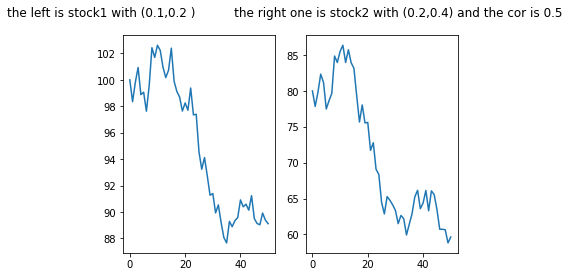

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('the left is stock1 with (0.1,0.2 )          the right one is stock2 with (0.2,0.4) and the cor is 0.5')

P1 = generate_corr_GBM_path(50,100,80,0.1,0.2,0.2,0.4,0.5)
ax1.plot(P1[0])
ax2.plot(P1[1])

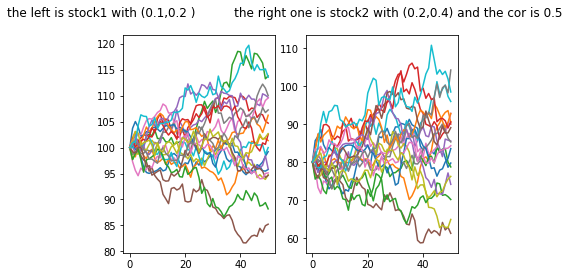

In [266]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('the left is stock1 with (0.1,0.2 )          the right one is stock2 with (0.2,0.4) and the cor is 0.5')

for i in range(20):
    P1 = generate_corr_GBM_path(50,100,80,0.1,0.2,0.2,0.4,0.7)
    ax1.plot(P1[0])
    ax2.plot(P1[1])

plt.show()